# The aim of this notebook is to get an intuition of the sobel operator and the gradient of an image.

**Author:** Marcelo Garcia

## In this section we will get the gradient in either x-direction or y-direction (through sobel kernel)
  $$ G_x = S_x * Img $$
  $$ G_y = S_y * Img $$

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

### Expected result for a Threshold in "x" orientation

![](https://github.com/CheloGE/CarND-Tinker_with_Sobel_operator/blob/master/thresh-x-example.png?raw=1)

In [2]:
# This function applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=20, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', kernel_size=3, thresh_min=0, thresh_max=255, gradient=False):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray_img, ddepth=cv2.CV_64F, ksize=kernel_size, dx=1,dy=0) 
    elif orient == 'y':
        sobel = cv2.Sobel(gray_img, ddepth=cv2.CV_64F, ksize=kernel_size, dx=0,dy=1) 
    else:
        return -1
    if gradient:
      return sobel
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    mask = np.zeros_like(scaled_sobel)
    mask[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = mask # Remove this line
    
    return binary_output
    


In the above code the ```Sobel``` function parameter ```ddepth``` refers to the output image depth
In this case CV_64F is passed because we want a double data type. Please refer to all data types of Matrices to the following chart: 
![](https://github.com/CheloGE/CarND-Tinker_with_Sobel_operator/blob/master/Capture.JPG?raw=1)

* Reference: [link](https://stackoverflow.com/questions/25494152/what-is-the-meaning-of-matrix-type-in-opencv)

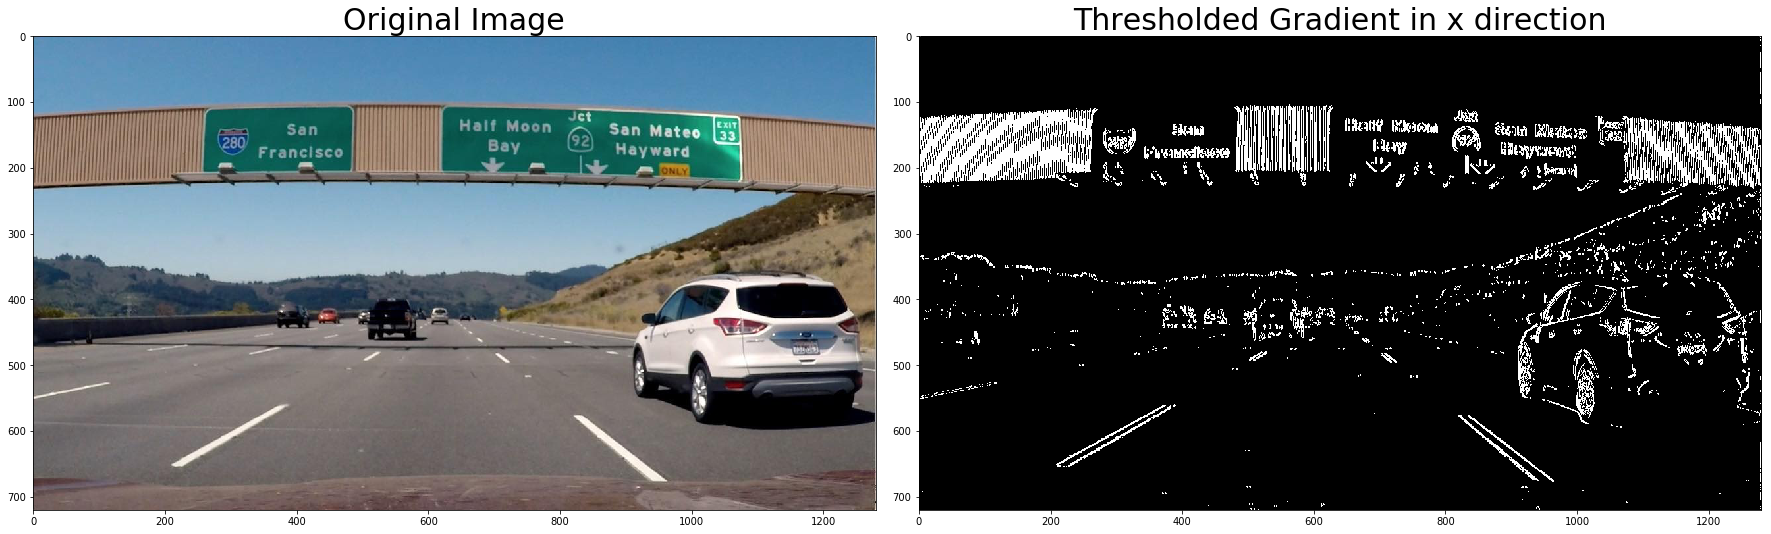

In [3]:
# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient in x direction', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## In this section we will get the magnitude of the gradient

To get the magnitude of the gradient we have to follow this formula

$$\|G\|=\sqrt(G_x^2+G_y^2) $$



In [4]:
## *****************************
  # The Output of the 2 below functions are equivalent. 
  # 1st one requires gradients Gx, Gy
  # 2nd one calculates Gx, Gy and then takes the magnitude.
## *****************************

def mag_thresh(img, Gx, Gy, mag_thresh=(0,255)):
  """
  This function gets the magnitude of the gradient based on the previous calculations of the gradients
  in the x-direction and y-direction
  """  
  mag_G = np.sqrt(Gx**2+Gy**2)
  scaled_mag_G = np.uint8(255*mag_G/np.max(mag_G))
  mask = np.zeros_like(scaled_mag_G)
  mask[(scaled_mag_G >= mag_thresh[0]) & (scaled_mag_G <= mag_thresh[1])] = 1
  return mask

def mag_thresh2(img, sobel_kernel=3, mag_thresh=(0, 255)):
    """
    This function gets the magnitude of the gradient without requiring previous gradient calculations.
    """  
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

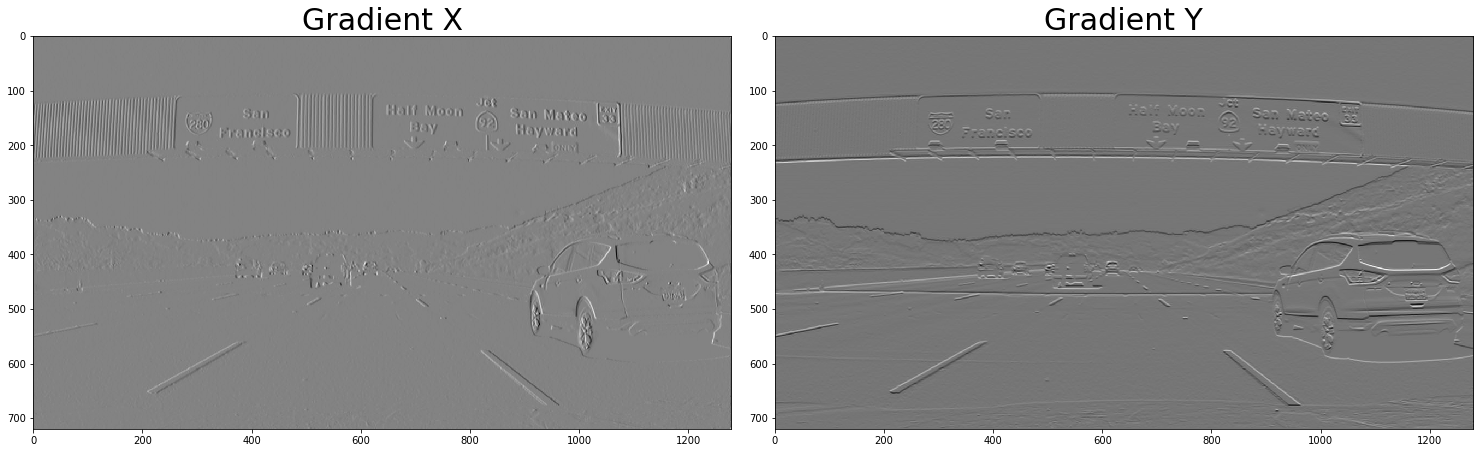

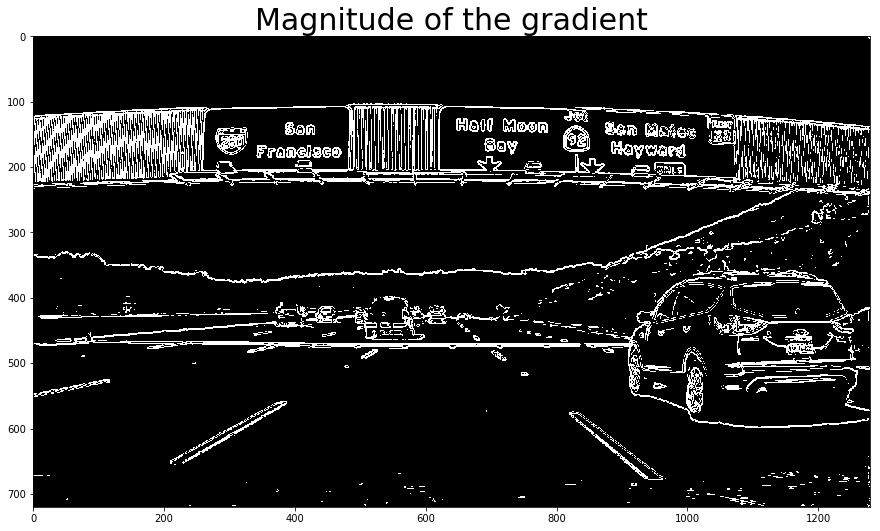

In [5]:
# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')
Gx = abs_sobel_thresh(image, orient='x', gradient=True)
Gy = abs_sobel_thresh(image, orient='y', gradient=True)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
f.tight_layout()
ax1.imshow(Gx, cmap='gray')
ax1.set_title('Gradient X', fontsize=30)
ax2.imshow(Gy, cmap='gray')
ax2.set_title('Gradient Y', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.figure(2, figsize=(15,15))
plt.title('Magnitude of the gradient', fontsize=30)
plt.imshow(mag_thresh(image, Gx, Gy, mag_thresh=(30,100)), cmap='gray');

## In this section we will get the orientation (AKA direction) of the gradient

To get the orientation of the gradient we have to follow this formula

$$G_\theta=atan2(Gy,Gx) $$

This is equivalent to (but with different range outputs):

$$arctan \left( \frac{Gy}{Gx} \right) $$



In [6]:
def orientation_threshold(img, Gx, Gy, dir_thresh=(0,np.pi/2)):
  """
  This function gets the orientation of the gradient based on the previous calculations of the gradients
  in the x-direction and y-direction
  """

  # Important to denote that in the below line 
  #  we are taking the absolute of both Gx & Gy because we want to take into account only values between 0 and pi/2
  # The reason is we want to threshold orientations in an easier manner. 
  # If we want a better and more detailed thresholding we should remove the absolute functions  
  orient_G = np.arctan2(np.absolute(Gy),np.absolute(Gx)) 
  #binary mask
  mask = np.zeros_like(orient_G)
  mask[(orient_G >= dir_thresh[0]) & (orient_G <= dir_thresh[1])] = 1 
  return mask

def dir_threshold(img, sobel_kernel=3, dir_thresh=(0, np.pi/2)):
    """
    This function gets the orientation of the gradient without requiring previous gradient calculations.
    """  
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= dir_thresh[0]) & (absgraddir <= dir_thresh[1])] = 1

    # Return the binary image
    return binary_output


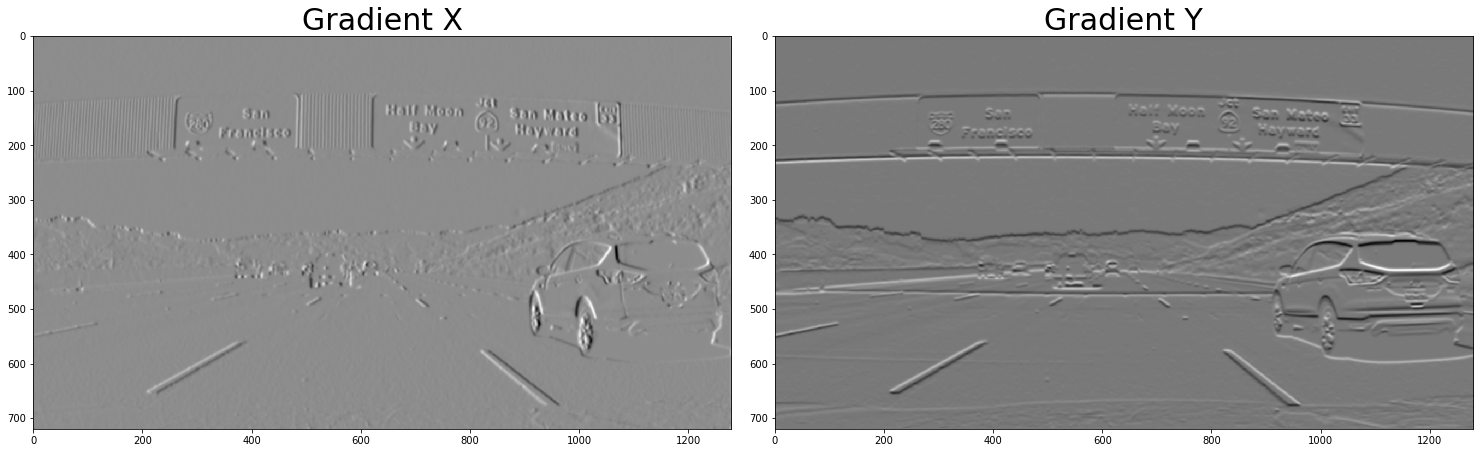

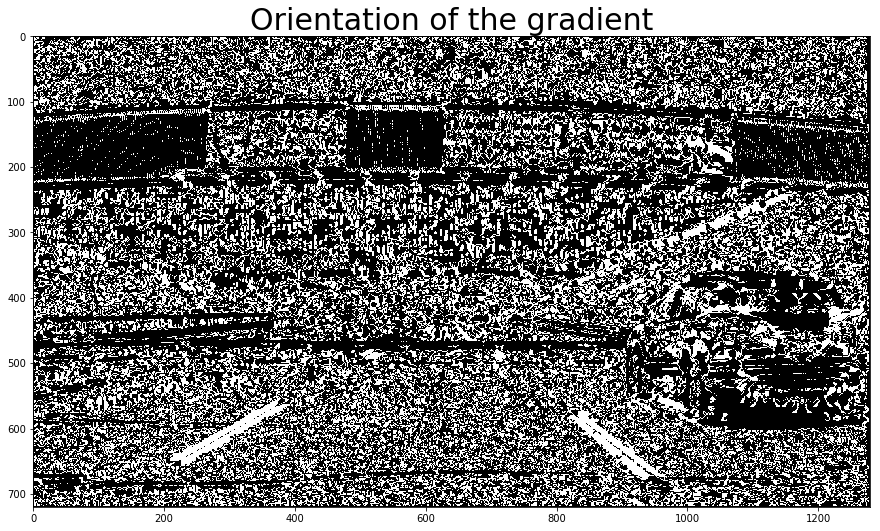

In [7]:
# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')
Gx = abs_sobel_thresh(image, kernel_size=15, orient='x', gradient=True)
Gy = abs_sobel_thresh(image, kernel_size=15, orient='y', gradient=True)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
f.tight_layout()
ax1.imshow(Gx, cmap='gray')
ax1.set_title('Gradient X', fontsize=30)
ax2.imshow(Gy, cmap='gray')
ax2.set_title('Gradient Y', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

plt.figure(3, figsize=(15,15))
plt.title('Orientation of the gradient', fontsize=30)
plt.imshow(orientation_threshold(image, Gx, Gy, dir_thresh=(0.7, 1.3)), cmap='gray');

## In this section we will combine the approaches magnitude + orientation of the gradient



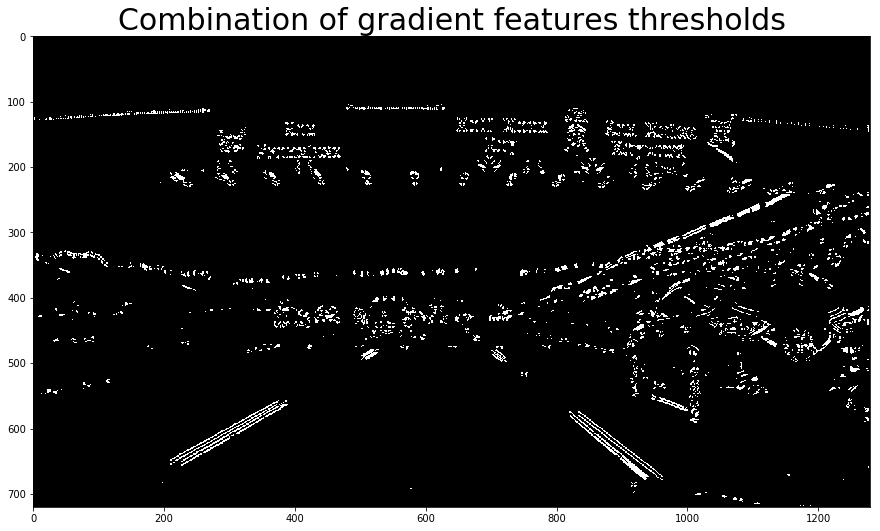

In [8]:
# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')
Gx = abs_sobel_thresh(image, kernel_size=15, orient='x', gradient=True)
Gy = abs_sobel_thresh(image, kernel_size=15, orient='y', gradient=True)

# Combination of gradient features
orient_grad = orientation_threshold(image, Gx, Gy, dir_thresh=(0.7, 1.3))
mag_grad = mag_thresh(image, Gx, Gy, mag_thresh=(30,100))
combined_grad = (orient_grad==1) & (mag_grad==1)
plt.figure(figsize=(15,15))
plt.title('Combination of gradient features thresholds', fontsize=30)
plt.imshow(combined_grad, cmap='gray');

**Conclusion** We can fine-tune the parameteres to filter out all edges but the lane line edges of interest